In [243]:
import cmdstanpy as c
import numpy as np
import seaborn as sns

In [193]:
# First we generate some data

In [ ]:
np.random.seed(837462873)
objects = 300
judges = 10
repeats = 2
mu = 10
sigma_J = 2
sigma_T = 3
#sigma_E = 0.3
sigma_I = np.arange(judges)/10 + 0.2
#print(sigma_I)
sigma_errors = np.tile(sigma_I,(objects,repeats,1))
sigma_errors = np.swapaxes(sigma_errors,1,2)
#print("sigma_errors=",sigma_errors)
x = mu+np.random.normal(scale=sigma_errors)
#print(data)
a = np.random.normal(size=judges, scale=sigma_J)+1
#print("a=",a)
b = np.random.normal(size=objects, scale=sigma_T) 
#print(expert_variances)
#print(data)
a.shape=(1,judges,1)
x+=a
a.shape=(judges)
b.shape=(objects,1,1)
x+=b
b.shape=(objects)

#print(data)

#print(data)
#for j in range(judges):
#    m_j = np.random.normal(real,expert
#for i in range(objects):
#    for j in 
#    data[i,

In [ ]:
sigma_E=np.mean(sigma_I)
print(sigma_E)
rho = (sigma_T*sigma_T)/(sigma_T*sigma_T + sigma_J*sigma_J + sigma_E*sigma_E)
print(rho)

In [348]:
data = {"N":objects,
        "J":judges,
        "R":repeats,
        "x":x}

In [349]:
m = c.CmdStanModel(stan_file="annelies.stan")

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:compiled model file: /home/jupyterlab/jupyterlab/lab/jesus.cerquides/annelies/annelies


In [ ]:
posterior = m.sample(data=data)

In [383]:
posterior.diagnose()

INFO:cmdstanpy:Processing csv files: /tmp/tmp93ns3lsn/annelies-202112220022-1-untke5_s.csv, /tmp/tmp93ns3lsn/annelies-202112220022-2-7bwa07fz.csv, /tmp/tmp93ns3lsn/annelies-202112220022-3-t7zddld5.csv, /tmp/tmp93ns3lsn/annelies-202112220022-4-9r1hp3gf.csv

Checking sampler transitions treedepth.
4000 of 4000 (1e+02%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.
Trajectories that are prematurely terminated due to this limit will result in slow exploration.
For optimal performance, increase this limit.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

The following parameters had fewer than 0.001 effective draws per transition:
  b[1], b[2], b[3], b[4], b[5], b[6], b[7], b[8], b[9], b[10], b[11], b[12], b[13], b[14], b[15], b[16], b[17], b[18], b[19], b[20], b[21], b[22], b[23], b[24], b[25], b[26], b[27], b[28], b[29], b[30], b[31], b[32], b[33], 

'Processing csv files: /tmp/tmp93ns3lsn/annelies-202112220022-1-untke5_s.csv, /tmp/tmp93ns3lsn/annelies-202112220022-2-7bwa07fz.csv, /tmp/tmp93ns3lsn/annelies-202112220022-3-t7zddld5.csv, /tmp/tmp93ns3lsn/annelies-202112220022-4-9r1hp3gf.csv\n\nChecking sampler transitions treedepth.\n4000 of 4000 (1e+02%) transitions hit the maximum treedepth limit of 10, or 2^10 leapfrog steps.\nTrajectories that are prematurely terminated due to this limit will result in slow exploration.\nFor optimal performance, increase this limit.\n\nChecking sampler transitions for divergences.\nNo divergent transitions found.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nThe following parameters had fewer than 0.001 effective draws per transition:\n  b[1], b[2], b[3], b[4], b[5], b[6], b[7], b[8], b[9], b[10], b[11], b[12], b[13], b[14], b[15], b[16], b[17], b[18], b[19], b[20], b[21], b[22], b[23], b[24], b[25], b[26], b[27], b[28], b[29], b[30], b[31], b[32], b[33], 

<AxesSubplot:ylabel='Density'>

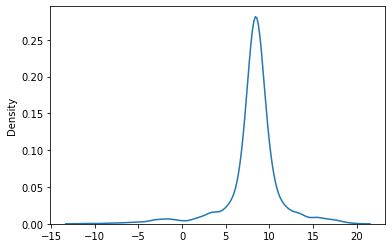

In [384]:
sns.kdeplot(posterior.stan_variable("mu"))

<AxesSubplot:ylabel='Density'>

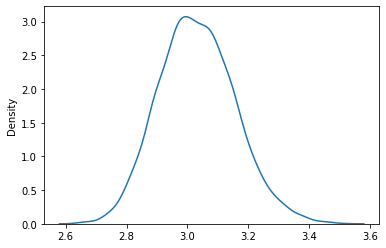

In [385]:
l_sigma_T=posterior.stan_variable("sigma_T")
sns.kdeplot(l_sigma_T)

In [386]:
np.median(l_sigma_T)

3.0260499999999997

<AxesSubplot:ylabel='Density'>

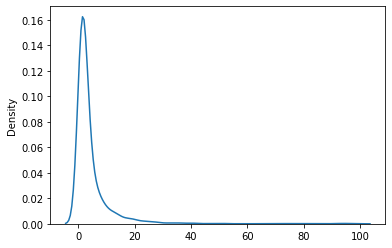

In [387]:
l_sigma_J=posterior.stan_variable("sigma_J")
sns.kdeplot(l_sigma_J)

In [388]:
np.median(l_sigma_J)

1.97377

In [389]:
l_sigma_I=posterior.stan_variable("sigma_I")

In [390]:
l_sigma_I.shape

(4000, 3)

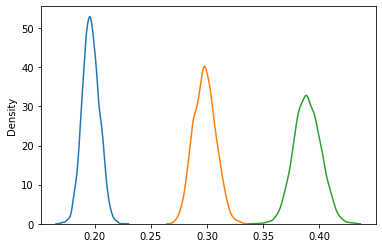

In [391]:
for i in range(judges):
    sns.kdeplot(l_sigma_I[:,i])

<AxesSubplot:ylabel='Density'>

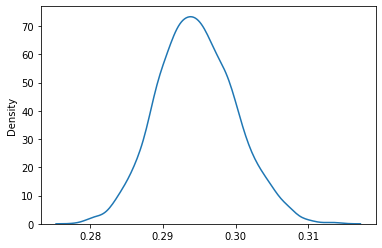

In [392]:
l_sigma_E=np.mean(l_sigma_I,axis=1)
sns.kdeplot(l_sigma_E)

In [393]:
rho=(l_sigma_T*l_sigma_T)/(l_sigma_T*l_sigma_T + l_sigma_J*l_sigma_J + l_sigma_E*l_sigma_E)

<AxesSubplot:ylabel='Density'>

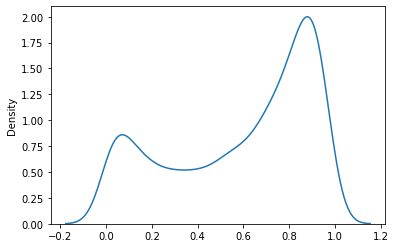

In [394]:
sns.kdeplot(rho)

In [395]:
opt = m.optimize(data=data,
                   algorithm="lbfgs",
                   init_alpha=1e-16)

INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [396]:
opt.stan_variables()

{'mu': array(8.41158),
 'sigma_T': array(3.00769),
 'sigma_J': array(0.765708),
 'sigma_I': array([0.151293, 0.290946, 0.382587]),
 'a': array([-0.387865, -0.693025,  1.06572 ]),
 'b': array([ 1.92959e-01,  1.74939e+00,  6.31645e-01, -4.37009e+00,
        -5.26477e+00, -7.34050e+00, -1.71101e+00,  1.70866e-01,
        -3.87284e+00, -3.16974e+00, -1.49863e-01, -1.40178e+00,
        -1.80193e-01, -1.94353e+00, -3.20423e+00,  8.65129e-01,
        -2.30691e-01, -1.32025e+00,  3.17501e+00,  2.84001e+00,
         1.97561e+00, -2.74392e+00, -2.27566e+00, -1.89569e+00,
         5.21063e-01, -3.50492e+00,  2.70107e-01,  2.50506e+00,
         4.75125e+00, -2.80954e-01,  2.22982e+00,  4.50136e+00,
        -4.23201e+00, -1.62534e+00,  3.14715e+00, -1.52719e+00,
        -2.37956e+00,  5.43442e+00,  1.27055e+00,  6.84383e+00,
         2.20678e-01,  1.02269e+00, -4.45475e-01,  3.86225e+00,
         3.76271e+00,  2.55886e+00,  2.21093e+00,  2.96084e+00,
         4.69658e+00, -1.63048e+00,  3.77523e+00

In [397]:
def icc(sigma_T,sigma_J,sigma_I,**kwargs):
    sigma_E=np.mean(sigma_I)
    rho = (sigma_T*sigma_T)/(sigma_T*sigma_T + sigma_J*sigma_J + sigma_E*sigma_E)
    return rho

In [398]:
icc(**opt.stan_variables())

0.9318196374407341

In [399]:
real = mu+b
inferred = opt.stan_variable("mu")+opt.stan_variable("b")
np.linalg.norm(real-inferred)

27.16636060765011

In [400]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real, inferred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

2.4600371622162793
1.5684505609729238


In [401]:
mean_pred = np.mean(np.mean(x,axis=2),axis=1)

In [402]:
mse = mean_squared_error(real, mean_pred)
print(mse)
rmse = np.sqrt(mse)
print(rmse)

2.4796254592741684
1.5746826535128176
